# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from itertools import product

# load dataset 6

In [2]:
df = pd.read_csv('6_combined_loan_to_value_ratio.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59180 entries, 0 to 59179
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   action_taken                              59180 non-null  int64  
 1   loan_type                                 59180 non-null  int64  
 2   lien_status                               59180 non-null  int64  
 3   open_end_line_of_credit                   59180 non-null  int64  
 4   loan_amount                               59180 non-null  int64  
 5   combined_loan_to_value_ratio              59180 non-null  object 
 6   interest_rate                             59180 non-null  object 
 7   total_loan_costs                          35359 non-null  float64
 8   origination_charges                       35359 non-null  float64
 9   loan_term                                 59157 non-null  float64
 10  negative_amortization             

In [4]:
print(df['total_loan_costs'].value_counts())

total_loan_costs
0.00        1055
695.00       342
635.43       177
505.43       147
15.43        141
            ... 
5482.15        1
702.25         1
15534.08       1
4450.43        1
1925.43        1
Name: count, Length: 28007, dtype: int64


In [5]:
unique_categories = df['total_loan_costs'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 28007


In [6]:
# First, convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['total_loan_costs'].min()
maximum_interest_rate = df['total_loan_costs'].max()
median_interest_rate = df['total_loan_costs'].median()

print("Minimum total_loan_costs:", minimum_interest_rate)
print("Maximum total_loan_costs:", maximum_interest_rate)
print("Median total_loan_costs:", median_interest_rate)

Minimum total_loan_costs: 0.0
Maximum total_loan_costs: 4713074.0
Median total_loan_costs: 3443.35


In [7]:
# Convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['total_loan_costs'].quantile(0.25)
Q3 = df['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_loan_costs'] < lower_bound) | (df['total_loan_costs'] > upper_bound)]

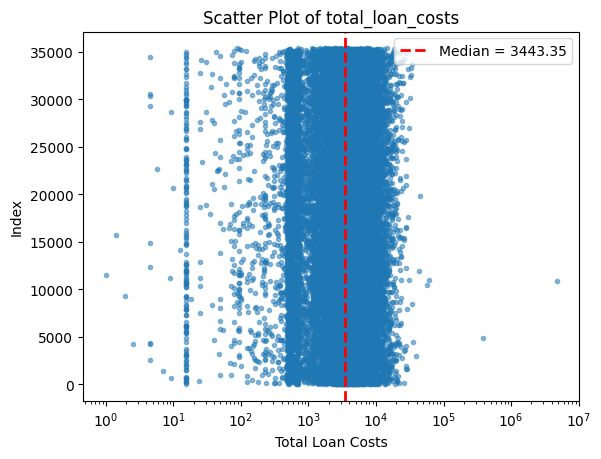

In [8]:
# Remove NaN values from the data
data = df['total_loan_costs'].dropna()

# Create a scatter plot
plt.scatter(data, range(len(data)), marker='.', alpha=0.5)

# Calculate the median
median_value = data.median()

# Add a line for the median
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median = {median_value:.2f}')


# Add labels and title
plt.xlabel('Total Loan Costs')
plt.ylabel('Index')
plt.title('Scatter Plot of total_loan_costs')

# Set a logarithmic scale for the x-axis if needed
plt.xscale('log')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## The outlier squashes the data.

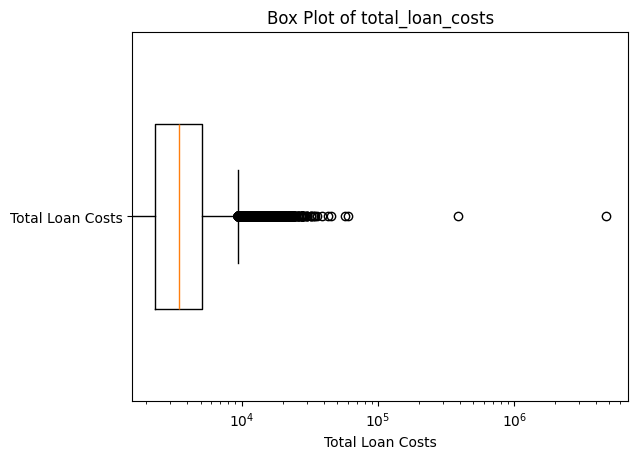

In [9]:
# Remove NaN values from the data
data = df['total_loan_costs'].dropna()

# Create a box plot
plt.boxplot(data, vert=False, widths=0.5, showfliers=True, labels=['Total Loan Costs'])

# Add labels and title
plt.xlabel('Total Loan Costs')
plt.title('Box Plot of total_loan_costs')

# Set a logarithmic scale for the x-axis if needed
plt.xscale('log')

# Show the plot
plt.show()


# Conclusion

we have to remove outliers.

# Remove outliers

In [10]:
df1 = df.copy()

In [11]:
# Calculate the IQR for total_loan_costs
Q1 = df1['total_loan_costs'].quantile(0.25)
Q3 = df1['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['total_loan_costs'] < lower_bound) | (df1['total_loan_costs'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 2037


In [12]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [13]:
# Display the values of the removed outliers
print(outliers_df['total_loan_costs'])

23830    13657.84
23840    13565.43
23849    11103.54
23862    19191.50
23873    10337.95
           ...   
59115    18566.05
59140     9982.80
59144    13263.60
59155    11323.76
59177    14537.12
Name: total_loan_costs, Length: 2037, dtype: float64


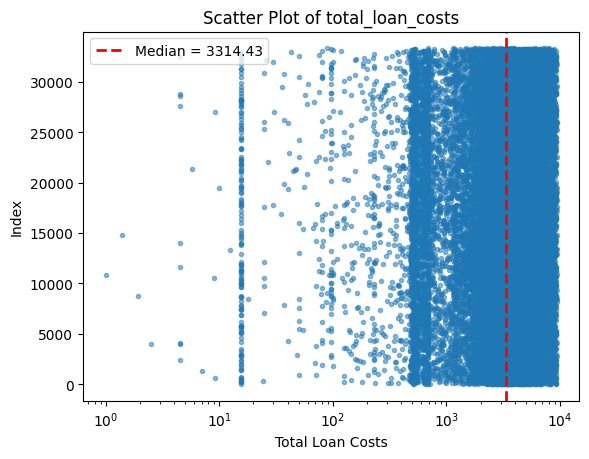

In [14]:
# Remove NaN values from the data
data = df_no_outliers['total_loan_costs'].dropna()

# Create a scatter plot
plt.scatter(data, range(len(data)), marker='.', alpha=0.5)

# Calculate the median
median_value = data.median()

# Add a line for the median
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median = {median_value:.2f}')

# Add labels and title
plt.xlabel('Total Loan Costs')
plt.ylabel('Index')
plt.title('Scatter Plot of total_loan_costs')

# Set a logarithmic scale for the x-axis if needed
plt.xscale('log')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [15]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'total_loan_costs'] = pd.to_numeric(df_no_outliers['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['total_loan_costs'].min()
maximum_interest_rate = df_no_outliers['total_loan_costs'].max()
median_interest_rate = df_no_outliers['total_loan_costs'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 9341.0
Median Interest Rate: 3314.43


In [16]:
print(df_no_outliers['total_loan_costs'].value_counts())

total_loan_costs
0.00       1055
695.00      342
635.43      177
505.43      147
15.43       141
           ... 
882.50        1
2985.91       1
4898.43       1
3054.65       1
1925.43       1
Name: count, Length: 25977, dtype: int64


In [17]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['total_loan_costs'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['total_loan_costs'].isin(values_to_remove)]


# Make range categories

In [18]:
import pandas as pd

new_df = df_no_outliers.copy()

# Convert 'total_loan_costs' to numeric values
new_df['total_loan_costs'] = pd.to_numeric(new_df['total_loan_costs'], errors='coerce')

# Define a function to categorize 'total_loan_costs' into the desired ranges
def categorize_total_loan_costs(cost):
    if pd.isna(cost):
        return '0-500'
    if 0 <= cost < 500:
        return '0-500'
    elif 500 <= cost < 1000:
        return '500-1000'
    elif 1000 <= cost < 1500:
        return '1000-1500'
    elif 1500 <= cost < 2000:
        return '1500-2000'
    elif 2000 <= cost < 2500:
        return '2000-2500'
    elif 2500 <= cost < 3000:
        return '2500-3000'
    elif 3000 <= cost < 3500:
        return '3000-3500'
    elif 3500 <= cost < 4000:
        return '3500-4000'
    elif 4000 <= cost < 4500:
        return '4000-4500'
    elif 4500 <= cost < 5000:
        return '4500-5000'
    elif 5000 <= cost < 5500:
        return '5000-5500'
    elif 5500 <= cost < 6000:
        return '5500-6000'
    elif 6000 <= cost < 6500:
        return '6000-6500'
    elif 6500 <= cost < 7000:
        return '6500-7000'
    elif 7000 <= cost < 7500:
        return '7000-7500'
    elif 7500 <= cost < 8000:
        return '7500-8000'
    elif 8000 <= cost < 8500:
        return '8000-8500'
    elif 8500 <= cost < 9000:
        return '8500-9000'
    elif 9000 <= cost < 9500:
        return '9000-9500'
    else:
        print(cost)
        return 'Other'

# Apply the categorization function to 'total_loan_costs' column
new_df['total_loan_costs'] = new_df['total_loan_costs'].apply(categorize_total_loan_costs)

# Print the result
print(new_df['total_loan_costs'].value_counts())


total_loan_costs
0-500        25796
3000-3500     4176
2500-3000     4000
3500-4000     3346
2000-2500     2741
4000-4500     2557
500-1000      2549
4500-5000     2003
5000-5500     1631
1500-2000     1566
5500-6000     1358
1000-1500     1138
6000-6500     1038
6500-7000      889
7000-7500      667
7500-8000      592
8000-8500      485
8500-9000      366
9000-9500      245
Name: count, dtype: int64


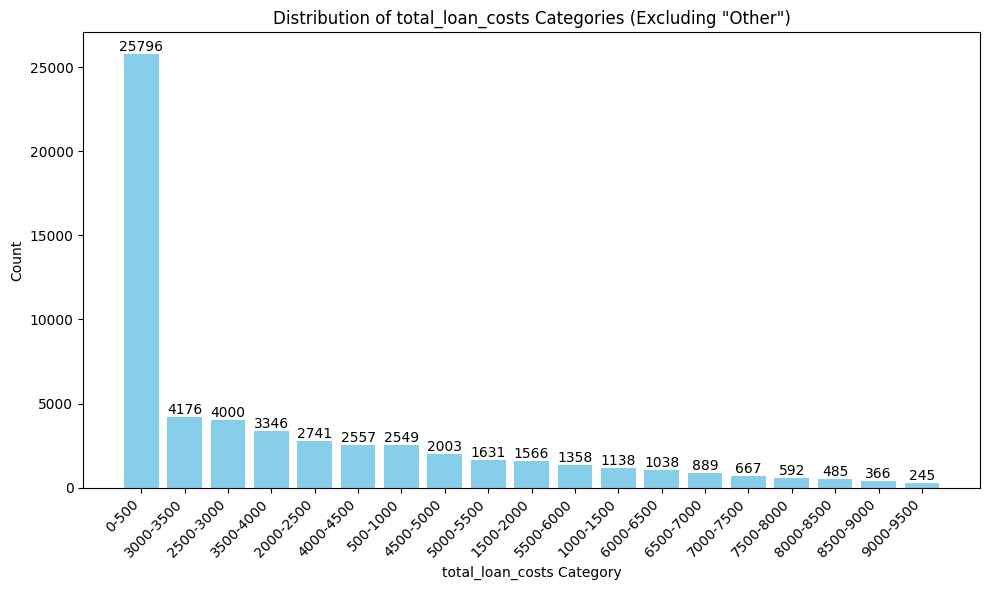

In [19]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['total_loan_costs'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['total_loan_costs'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('total_loan_costs Category')
plt.ylabel('Count')
plt.title('Distribution of total_loan_costs Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
new_df.to_csv('7_total_loan_costs.csv', index=False)